## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  25.451449   292.683124  0.443619  7.330704  1.451127
1  70.234435  1567.484035  0.630085  3.755201  1.561860
2  23.019871  1690.965395  0.262600  5.315012  1.525357
3  24.622083   595.505075  0.441488  4.077369  1.546820
4  26.201140  1527.445724  0.186505  2.895484  1.600581


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.05899 | train_mse: 6.04551 | train_mae: 1.63004 |  0:00:00s
epoch 1  | loss: 1.10356 | train_mse: 2.05846 | train_mae: 1.10915 |  0:00:00s
epoch 2  | loss: 0.66885 | train_mse: 2.94005 | train_mae: 1.34897 |  0:00:00s


epoch 3  | loss: 0.48629 | train_mse: 1.96059 | train_mae: 1.11774 |  0:00:00s
epoch 4  | loss: 0.51094 | train_mse: 1.17695 | train_mae: 0.86891 |  0:00:00s
epoch 5  | loss: 0.38247 | train_mse: 3.16846 | train_mae: 1.29987 |  0:00:00s


epoch 6  | loss: 0.37214 | train_mse: 5.64261 | train_mae: 1.58886 |  0:00:00s
epoch 7  | loss: 0.35295 | train_mse: 6.34755 | train_mae: 1.53558 |  0:00:00s


epoch 8  | loss: 0.34585 | train_mse: 5.78029 | train_mae: 1.43245 |  0:00:00s
epoch 9  | loss: 0.44628 | train_mse: 3.24775 | train_mae: 1.17086 |  0:00:01s
epoch 10 | loss: 0.37192 | train_mse: 1.74417 | train_mae: 0.95974 |  0:00:01s


epoch 11 | loss: 0.39328 | train_mse: 0.81449 | train_mae: 0.68645 |  0:00:01s
epoch 12 | loss: 0.41444 | train_mse: 0.87176 | train_mae: 0.7091  |  0:00:01s
epoch 13 | loss: 0.53173 | train_mse: 0.85405 | train_mae: 0.69329 |  0:00:01s
epoch 14 | loss: 0.3006  | train_mse: 0.76015 | train_mae: 0.60623 |  0:00:01s


epoch 15 | loss: 0.28835 | train_mse: 0.78697 | train_mae: 0.6141  |  0:00:01s
epoch 16 | loss: 0.33227 | train_mse: 0.64177 | train_mae: 0.57198 |  0:00:01s
epoch 17 | loss: 0.49663 | train_mse: 0.54442 | train_mae: 0.53664 |  0:00:01s


epoch 18 | loss: 0.41738 | train_mse: 0.49301 | train_mae: 0.5246  |  0:00:01s
epoch 19 | loss: 0.30335 | train_mse: 0.37354 | train_mae: 0.48636 |  0:00:01s
epoch 20 | loss: 0.31271 | train_mse: 0.31509 | train_mae: 0.45331 |  0:00:01s


epoch 21 | loss: 0.33732 | train_mse: 0.31107 | train_mae: 0.45277 |  0:00:01s
epoch 22 | loss: 0.30883 | train_mse: 0.31655 | train_mae: 0.44076 |  0:00:01s
epoch 23 | loss: 0.29863 | train_mse: 0.38483 | train_mae: 0.47333 |  0:00:02s


epoch 24 | loss: 0.38848 | train_mse: 0.37221 | train_mae: 0.46498 |  0:00:02s
epoch 25 | loss: 0.33638 | train_mse: 0.27431 | train_mae: 0.39337 |  0:00:02s
epoch 26 | loss: 0.35479 | train_mse: 0.2586  | train_mae: 0.38898 |  0:00:02s
epoch 27 | loss: 0.28216 | train_mse: 0.27062 | train_mae: 0.39584 |  0:00:02s


epoch 28 | loss: 0.31194 | train_mse: 0.22971 | train_mae: 0.36975 |  0:00:02s
epoch 29 | loss: 0.22944 | train_mse: 0.28257 | train_mae: 0.38062 |  0:00:02s
epoch 30 | loss: 0.31809 | train_mse: 0.29923 | train_mae: 0.37524 |  0:00:02s
epoch 31 | loss: 0.24506 | train_mse: 0.3349  | train_mae: 0.38939 |  0:00:02s


epoch 32 | loss: 0.33702 | train_mse: 0.31543 | train_mae: 0.3781  |  0:00:02s
epoch 33 | loss: 0.27713 | train_mse: 0.24818 | train_mae: 0.35526 |  0:00:02s
epoch 34 | loss: 0.25419 | train_mse: 0.20238 | train_mae: 0.3379  |  0:00:02s
epoch 35 | loss: 0.22265 | train_mse: 0.19715 | train_mae: 0.34086 |  0:00:02s


epoch 36 | loss: 0.24333 | train_mse: 0.23973 | train_mae: 0.36961 |  0:00:02s
epoch 37 | loss: 0.29575 | train_mse: 0.25999 | train_mae: 0.37489 |  0:00:02s
epoch 38 | loss: 0.24915 | train_mse: 0.2796  | train_mae: 0.37217 |  0:00:03s


epoch 39 | loss: 0.26475 | train_mse: 0.32473 | train_mae: 0.3857  |  0:00:03s
epoch 40 | loss: 0.32633 | train_mse: 0.30897 | train_mae: 0.3771  |  0:00:03s
epoch 41 | loss: 0.18936 | train_mse: 0.27274 | train_mae: 0.35965 |  0:00:03s
epoch 42 | loss: 0.17251 | train_mse: 0.24156 | train_mae: 0.34746 |  0:00:03s


epoch 43 | loss: 0.23309 | train_mse: 0.31907 | train_mae: 0.39869 |  0:00:03s
epoch 44 | loss: 0.21144 | train_mse: 0.35517 | train_mae: 0.41921 |  0:00:03s
epoch 45 | loss: 0.23489 | train_mse: 0.27534 | train_mae: 0.37237 |  0:00:03s
epoch 46 | loss: 0.3385  | train_mse: 0.24704 | train_mae: 0.34827 |  0:00:03s


epoch 47 | loss: 0.17506 | train_mse: 0.17583 | train_mae: 0.30559 |  0:00:03s
epoch 48 | loss: 0.24185 | train_mse: 0.17655 | train_mae: 0.30375 |  0:00:03s
epoch 49 | loss: 0.21563 | train_mse: 0.20054 | train_mae: 0.32289 |  0:00:03s


epoch 50 | loss: 0.21036 | train_mse: 0.18874 | train_mae: 0.31433 |  0:00:03s
epoch 51 | loss: 0.20687 | train_mse: 0.14004 | train_mae: 0.2793  |  0:00:03s
epoch 52 | loss: 0.27242 | train_mse: 0.15532 | train_mae: 0.30306 |  0:00:04s


epoch 53 | loss: 0.16241 | train_mse: 0.10883 | train_mae: 0.2503  |  0:00:04s
epoch 54 | loss: 0.16371 | train_mse: 0.16057 | train_mae: 0.29479 |  0:00:04s
epoch 55 | loss: 0.24615 | train_mse: 0.19072 | train_mae: 0.3259  |  0:00:04s


epoch 56 | loss: 0.20461 | train_mse: 0.13518 | train_mae: 0.28511 |  0:00:04s
epoch 57 | loss: 0.17294 | train_mse: 0.12126 | train_mae: 0.27165 |  0:00:04s
epoch 58 | loss: 0.19982 | train_mse: 0.14139 | train_mae: 0.29813 |  0:00:04s
epoch 59 | loss: 0.13294 | train_mse: 0.12131 | train_mae: 0.2684  |  0:00:04s


epoch 60 | loss: 0.19415 | train_mse: 0.11925 | train_mae: 0.26428 |  0:00:04s
epoch 61 | loss: 0.12194 | train_mse: 0.09809 | train_mae: 0.2445  |  0:00:04s
epoch 62 | loss: 0.11818 | train_mse: 0.12013 | train_mae: 0.26722 |  0:00:04s


epoch 63 | loss: 0.26786 | train_mse: 0.12947 | train_mae: 0.28186 |  0:00:04s
epoch 64 | loss: 0.14741 | train_mse: 0.11461 | train_mae: 0.25799 |  0:00:04s
epoch 65 | loss: 0.15578 | train_mse: 0.28969 | train_mae: 0.37921 |  0:00:05s


epoch 66 | loss: 0.13537 | train_mse: 0.3766  | train_mae: 0.4248  |  0:00:05s
epoch 67 | loss: 0.17585 | train_mse: 0.27232 | train_mae: 0.37574 |  0:00:05s
epoch 68 | loss: 0.12083 | train_mse: 0.22457 | train_mae: 0.34057 |  0:00:05s


epoch 69 | loss: 0.13288 | train_mse: 0.11532 | train_mae: 0.2566  |  0:00:05s
epoch 70 | loss: 0.16453 | train_mse: 0.10396 | train_mae: 0.24751 |  0:00:05s
epoch 71 | loss: 0.17705 | train_mse: 0.09576 | train_mae: 0.24023 |  0:00:05s


epoch 72 | loss: 0.1641  | train_mse: 0.09398 | train_mae: 0.23754 |  0:00:05s
epoch 73 | loss: 0.17173 | train_mse: 0.11089 | train_mae: 0.2642  |  0:00:05s
epoch 74 | loss: 0.14883 | train_mse: 0.1185  | train_mae: 0.27146 |  0:00:05s


epoch 75 | loss: 0.20683 | train_mse: 0.1239  | train_mae: 0.26917 |  0:00:05s


epoch 76 | loss: 0.19644 | train_mse: 0.14881 | train_mae: 0.29212 |  0:00:06s
epoch 77 | loss: 0.14734 | train_mse: 0.15741 | train_mae: 0.29536 |  0:00:06s
epoch 78 | loss: 0.25433 | train_mse: 0.1716  | train_mae: 0.30562 |  0:00:06s


epoch 79 | loss: 0.36813 | train_mse: 0.15115 | train_mae: 0.28323 |  0:00:06s
epoch 80 | loss: 0.20934 | train_mse: 0.12261 | train_mae: 0.26356 |  0:00:06s
epoch 81 | loss: 0.30145 | train_mse: 0.19172 | train_mae: 0.34857 |  0:00:06s
epoch 82 | loss: 0.30973 | train_mse: 0.14408 | train_mae: 0.30281 |  0:00:06s


epoch 83 | loss: 0.15715 | train_mse: 0.09718 | train_mae: 0.24588 |  0:00:06s
epoch 84 | loss: 0.14884 | train_mse: 0.11077 | train_mae: 0.26657 |  0:00:06s
epoch 85 | loss: 0.19403 | train_mse: 0.11631 | train_mae: 0.26118 |  0:00:06s


epoch 86 | loss: 0.20175 | train_mse: 0.12604 | train_mae: 0.27416 |  0:00:07s
epoch 87 | loss: 0.15808 | train_mse: 0.11116 | train_mae: 0.26376 |  0:00:07s
epoch 88 | loss: 0.14001 | train_mse: 0.09342 | train_mae: 0.24576 |  0:00:07s
epoch 89 | loss: 0.13903 | train_mse: 0.08985 | train_mae: 0.23597 |  0:00:07s


epoch 90 | loss: 0.15547 | train_mse: 0.09055 | train_mae: 0.2365  |  0:00:07s
epoch 91 | loss: 0.16199 | train_mse: 0.09679 | train_mae: 0.2472  |  0:00:07s
epoch 92 | loss: 0.10748 | train_mse: 0.12036 | train_mae: 0.26457 |  0:00:07s
epoch 93 | loss: 0.16042 | train_mse: 0.10176 | train_mae: 0.23978 |  0:00:07s


epoch 94 | loss: 0.10441 | train_mse: 0.10511 | train_mae: 0.24975 |  0:00:07s
epoch 95 | loss: 0.11474 | train_mse: 0.10789 | train_mae: 0.26205 |  0:00:07s
epoch 96 | loss: 0.14524 | train_mse: 0.10975 | train_mae: 0.26916 |  0:00:07s
epoch 97 | loss: 0.23845 | train_mse: 0.11457 | train_mae: 0.26881 |  0:00:07s


epoch 98 | loss: 0.16681 | train_mse: 0.10845 | train_mae: 0.25896 |  0:00:07s
epoch 99 | loss: 0.16702 | train_mse: 0.11573 | train_mae: 0.26924 |  0:00:07s
epoch 100| loss: 0.1945  | train_mse: 0.1305  | train_mae: 0.28267 |  0:00:07s
epoch 101| loss: 0.11367 | train_mse: 0.09888 | train_mae: 0.24846 |  0:00:08s


epoch 102| loss: 0.21455 | train_mse: 0.09184 | train_mae: 0.23445 |  0:00:08s
epoch 103| loss: 0.17218 | train_mse: 0.0928  | train_mae: 0.23483 |  0:00:08s
epoch 104| loss: 0.1906  | train_mse: 0.14717 | train_mae: 0.28046 |  0:00:08s
epoch 105| loss: 0.2279  | train_mse: 0.14974 | train_mae: 0.28237 |  0:00:08s


epoch 106| loss: 0.1861  | train_mse: 0.11094 | train_mae: 0.24463 |  0:00:08s
epoch 107| loss: 0.241   | train_mse: 0.12468 | train_mae: 0.268   |  0:00:08s
epoch 108| loss: 0.13948 | train_mse: 0.13694 | train_mae: 0.28254 |  0:00:08s
epoch 109| loss: 0.15658 | train_mse: 0.15358 | train_mae: 0.29074 |  0:00:08s


epoch 110| loss: 0.14938 | train_mse: 0.16093 | train_mae: 0.28642 |  0:00:08s
epoch 111| loss: 0.09623 | train_mse: 0.13981 | train_mae: 0.2807  |  0:00:08s
epoch 112| loss: 0.15412 | train_mse: 0.12025 | train_mae: 0.26134 |  0:00:08s
epoch 113| loss: 0.13841 | train_mse: 0.13674 | train_mae: 0.27101 |  0:00:08s


epoch 114| loss: 0.09702 | train_mse: 0.20481 | train_mae: 0.30143 |  0:00:08s
epoch 115| loss: 0.13116 | train_mse: 0.17337 | train_mae: 0.28273 |  0:00:08s
epoch 116| loss: 0.10247 | train_mse: 0.1378  | train_mae: 0.26024 |  0:00:09s


epoch 117| loss: 0.20241 | train_mse: 0.13188 | train_mae: 0.26848 |  0:00:09s
epoch 118| loss: 0.11571 | train_mse: 0.17448 | train_mae: 0.29636 |  0:00:09s
epoch 119| loss: 0.20164 | train_mse: 0.24953 | train_mae: 0.34007 |  0:00:09s
epoch 120| loss: 0.14891 | train_mse: 0.19714 | train_mae: 0.31265 |  0:00:09s


epoch 121| loss: 0.10235 | train_mse: 0.12765 | train_mae: 0.25702 |  0:00:09s
epoch 122| loss: 0.18591 | train_mse: 0.10041 | train_mae: 0.24889 |  0:00:09s
epoch 123| loss: 0.17752 | train_mse: 0.09824 | train_mae: 0.24749 |  0:00:09s
epoch 124| loss: 0.15091 | train_mse: 0.08122 | train_mae: 0.22002 |  0:00:09s


epoch 125| loss: 0.1242  | train_mse: 0.15442 | train_mae: 0.27437 |  0:00:09s
epoch 126| loss: 0.14229 | train_mse: 0.32167 | train_mae: 0.37387 |  0:00:09s
epoch 127| loss: 0.13572 | train_mse: 0.3667  | train_mae: 0.39231 |  0:00:09s
epoch 128| loss: 0.13323 | train_mse: 0.26406 | train_mae: 0.33805 |  0:00:09s


epoch 129| loss: 0.15139 | train_mse: 0.18524 | train_mae: 0.28533 |  0:00:09s
epoch 130| loss: 0.25125 | train_mse: 0.10992 | train_mae: 0.23134 |  0:00:09s
epoch 131| loss: 0.23369 | train_mse: 0.09023 | train_mae: 0.23424 |  0:00:10s


epoch 132| loss: 0.11588 | train_mse: 0.07888 | train_mae: 0.21432 |  0:00:10s
epoch 133| loss: 0.14405 | train_mse: 0.07776 | train_mae: 0.21369 |  0:00:10s
epoch 134| loss: 0.14223 | train_mse: 0.08276 | train_mae: 0.22175 |  0:00:10s


epoch 135| loss: 0.15758 | train_mse: 0.08879 | train_mae: 0.23118 |  0:00:10s
epoch 136| loss: 0.17979 | train_mse: 0.08634 | train_mae: 0.22938 |  0:00:10s
epoch 137| loss: 0.12343 | train_mse: 0.08946 | train_mae: 0.23405 |  0:00:10s
epoch 138| loss: 0.21841 | train_mse: 0.08508 | train_mae: 0.2265  |  0:00:10s


epoch 139| loss: 0.11689 | train_mse: 0.08588 | train_mae: 0.23253 |  0:00:10s
epoch 140| loss: 0.1781  | train_mse: 0.08253 | train_mae: 0.2312  |  0:00:10s
epoch 141| loss: 0.14476 | train_mse: 0.07596 | train_mae: 0.22015 |  0:00:10s
epoch 142| loss: 0.11857 | train_mse: 0.07876 | train_mae: 0.22537 |  0:00:10s


epoch 143| loss: 0.22703 | train_mse: 0.08417 | train_mae: 0.22343 |  0:00:10s
epoch 144| loss: 0.23507 | train_mse: 0.07747 | train_mae: 0.2099  |  0:00:10s
epoch 145| loss: 0.11261 | train_mse: 0.07952 | train_mae: 0.21306 |  0:00:10s
epoch 146| loss: 0.14525 | train_mse: 0.08167 | train_mae: 0.21805 |  0:00:11s


epoch 147| loss: 0.08472 | train_mse: 0.09822 | train_mae: 0.23377 |  0:00:11s
epoch 148| loss: 0.10257 | train_mse: 0.1134  | train_mae: 0.24605 |  0:00:11s
epoch 149| loss: 0.15186 | train_mse: 0.10261 | train_mae: 0.2386  |  0:00:11s


epoch 150| loss: 0.13398 | train_mse: 0.10362 | train_mae: 0.23703 |  0:00:11s
epoch 151| loss: 0.09246 | train_mse: 0.11766 | train_mae: 0.24237 |  0:00:11s
epoch 152| loss: 0.20192 | train_mse: 0.12475 | train_mae: 0.2485  |  0:00:11s


epoch 153| loss: 0.10884 | train_mse: 0.13554 | train_mae: 0.26118 |  0:00:11s
epoch 154| loss: 0.19354 | train_mse: 0.11633 | train_mae: 0.25339 |  0:00:11s
epoch 155| loss: 0.24143 | train_mse: 0.07656 | train_mae: 0.22487 |  0:00:11s
epoch 156| loss: 0.16578 | train_mse: 0.06192 | train_mae: 0.19862 |  0:00:11s
epoch 157| loss: 0.10105 | train_mse: 0.06902 | train_mae: 0.21038 |  0:00:11s


epoch 158| loss: 0.12368 | train_mse: 0.07629 | train_mae: 0.22409 |  0:00:11s
epoch 159| loss: 0.09229 | train_mse: 0.07646 | train_mae: 0.22157 |  0:00:11s
epoch 160| loss: 0.20738 | train_mse: 0.0739  | train_mae: 0.20805 |  0:00:12s


epoch 161| loss: 0.13895 | train_mse: 0.08174 | train_mae: 0.21968 |  0:00:12s
epoch 162| loss: 0.11633 | train_mse: 0.08804 | train_mae: 0.21728 |  0:00:12s
epoch 163| loss: 0.10814 | train_mse: 0.08473 | train_mae: 0.214   |  0:00:12s


epoch 164| loss: 0.10656 | train_mse: 0.0815  | train_mae: 0.21159 |  0:00:12s
epoch 165| loss: 0.11392 | train_mse: 0.07098 | train_mae: 0.20792 |  0:00:12s
epoch 166| loss: 0.09659 | train_mse: 0.06783 | train_mae: 0.20656 |  0:00:12s
epoch 167| loss: 0.20622 | train_mse: 0.08239 | train_mae: 0.22418 |  0:00:12s


epoch 168| loss: 0.14167 | train_mse: 0.08373 | train_mae: 0.22262 |  0:00:12s
epoch 169| loss: 0.12269 | train_mse: 0.08022 | train_mae: 0.2217  |  0:00:12s
epoch 170| loss: 0.10397 | train_mse: 0.07624 | train_mae: 0.21162 |  0:00:12s
epoch 171| loss: 0.10432 | train_mse: 0.07824 | train_mae: 0.21237 |  0:00:12s


epoch 172| loss: 0.18093 | train_mse: 0.09021 | train_mae: 0.21945 |  0:00:12s
epoch 173| loss: 0.10527 | train_mse: 0.09773 | train_mae: 0.22652 |  0:00:12s
epoch 174| loss: 0.13882 | train_mse: 0.09236 | train_mae: 0.22282 |  0:00:13s


epoch 175| loss: 0.14094 | train_mse: 0.06749 | train_mae: 0.20167 |  0:00:13s
epoch 176| loss: 0.21066 | train_mse: 0.06662 | train_mae: 0.20072 |  0:00:13s
epoch 177| loss: 0.11037 | train_mse: 0.06429 | train_mae: 0.19898 |  0:00:13s


epoch 178| loss: 0.11657 | train_mse: 0.06568 | train_mae: 0.19857 |  0:00:13s
epoch 179| loss: 0.10595 | train_mse: 0.09449 | train_mae: 0.22044 |  0:00:13s
epoch 180| loss: 0.09219 | train_mse: 0.12572 | train_mae: 0.2527  |  0:00:13s
epoch 181| loss: 0.17951 | train_mse: 0.11747 | train_mae: 0.25251 |  0:00:13s


epoch 182| loss: 0.17324 | train_mse: 0.1106  | train_mae: 0.2493  |  0:00:13s
epoch 183| loss: 0.13165 | train_mse: 0.15091 | train_mae: 0.27927 |  0:00:13s
epoch 184| loss: 0.11718 | train_mse: 0.15695 | train_mae: 0.27578 |  0:00:13s


epoch 185| loss: 0.0772  | train_mse: 0.16841 | train_mae: 0.27692 |  0:00:13s
epoch 186| loss: 0.10412 | train_mse: 0.17685 | train_mae: 0.27301 |  0:00:13s
epoch 187| loss: 0.11147 | train_mse: 0.18331 | train_mae: 0.27284 |  0:00:13s
epoch 188| loss: 0.12012 | train_mse: 0.19906 | train_mae: 0.28623 |  0:00:14s


epoch 189| loss: 0.13947 | train_mse: 0.21496 | train_mae: 0.28782 |  0:00:14s
epoch 190| loss: 0.12676 | train_mse: 0.20241 | train_mae: 0.28781 |  0:00:14s
epoch 191| loss: 0.12917 | train_mse: 0.2123  | train_mae: 0.30184 |  0:00:14s
epoch 192| loss: 0.12288 | train_mse: 0.21853 | train_mae: 0.31719 |  0:00:14s


epoch 193| loss: 0.08558 | train_mse: 0.15196 | train_mae: 0.26728 |  0:00:14s
epoch 194| loss: 0.19149 | train_mse: 0.13341 | train_mae: 0.25307 |  0:00:14s
epoch 195| loss: 0.15916 | train_mse: 0.1085  | train_mae: 0.24836 |  0:00:14s
epoch 196| loss: 0.14547 | train_mse: 0.11471 | train_mae: 0.25385 |  0:00:14s


epoch 197| loss: 0.12256 | train_mse: 0.1294  | train_mae: 0.25059 |  0:00:14s
epoch 198| loss: 0.24982 | train_mse: 0.1677  | train_mae: 0.28661 |  0:00:14s
epoch 199| loss: 0.13894 | train_mse: 0.15492 | train_mae: 0.29562 |  0:00:14s
epoch 200| loss: 0.13774 | train_mse: 0.08756 | train_mae: 0.23017 |  0:00:14s


epoch 201| loss: 0.18834 | train_mse: 0.07597 | train_mae: 0.21394 |  0:00:14s
epoch 202| loss: 0.15599 | train_mse: 0.08019 | train_mae: 0.22331 |  0:00:14s
epoch 203| loss: 0.17048 | train_mse: 0.08882 | train_mae: 0.23992 |  0:00:15s
epoch 204| loss: 0.1075  | train_mse: 0.08115 | train_mae: 0.22971 |  0:00:15s


epoch 205| loss: 0.19729 | train_mse: 0.07728 | train_mae: 0.22285 |  0:00:15s
epoch 206| loss: 0.1029  | train_mse: 0.10187 | train_mae: 0.24141 |  0:00:15s
epoch 207| loss: 0.14267 | train_mse: 0.12849 | train_mae: 0.25301 |  0:00:15s
epoch 208| loss: 0.12472 | train_mse: 0.13145 | train_mae: 0.25336 |  0:00:15s


epoch 209| loss: 0.09537 | train_mse: 0.10782 | train_mae: 0.23866 |  0:00:15s
epoch 210| loss: 0.14147 | train_mse: 0.07258 | train_mae: 0.2087  |  0:00:15s
epoch 211| loss: 0.1539  | train_mse: 0.06496 | train_mae: 0.20349 |  0:00:15s
epoch 212| loss: 0.15806 | train_mse: 0.08046 | train_mae: 0.22572 |  0:00:15s


epoch 213| loss: 0.11738 | train_mse: 0.08973 | train_mae: 0.22958 |  0:00:15s
epoch 214| loss: 0.18582 | train_mse: 0.06671 | train_mae: 0.2038  |  0:00:15s
epoch 215| loss: 0.10871 | train_mse: 0.06763 | train_mae: 0.20291 |  0:00:15s
epoch 216| loss: 0.14852 | train_mse: 0.07102 | train_mae: 0.20937 |  0:00:15s


epoch 217| loss: 0.15459 | train_mse: 0.07281 | train_mae: 0.21413 |  0:00:15s
epoch 218| loss: 0.17586 | train_mse: 0.09624 | train_mae: 0.25146 |  0:00:16s
epoch 219| loss: 0.09133 | train_mse: 0.09266 | train_mae: 0.2414  |  0:00:16s


epoch 220| loss: 0.14016 | train_mse: 0.08562 | train_mae: 0.23162 |  0:00:16s
epoch 221| loss: 0.14501 | train_mse: 0.08732 | train_mae: 0.22922 |  0:00:16s
epoch 222| loss: 0.13949 | train_mse: 0.08297 | train_mae: 0.21818 |  0:00:16s
epoch 223| loss: 0.10853 | train_mse: 0.10364 | train_mae: 0.23958 |  0:00:16s


epoch 224| loss: 0.29155 | train_mse: 0.2586  | train_mae: 0.36918 |  0:00:16s
epoch 225| loss: 0.1565  | train_mse: 0.21423 | train_mae: 0.33615 |  0:00:16s
epoch 226| loss: 0.1422  | train_mse: 0.12171 | train_mae: 0.27015 |  0:00:16s
epoch 227| loss: 0.15929 | train_mse: 0.09868 | train_mae: 0.23527 |  0:00:16s


epoch 228| loss: 0.13501 | train_mse: 0.12599 | train_mae: 0.24459 |  0:00:16s

Early stopping occurred at epoch 228 with best_epoch = 178 and best_train_mae = 0.19857
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

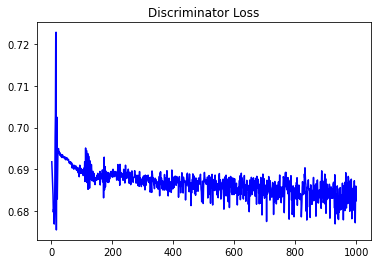

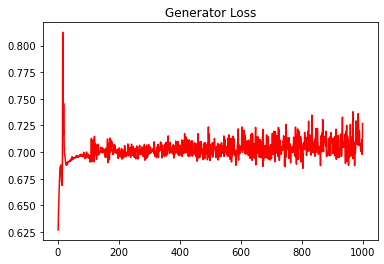

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.459421855835475


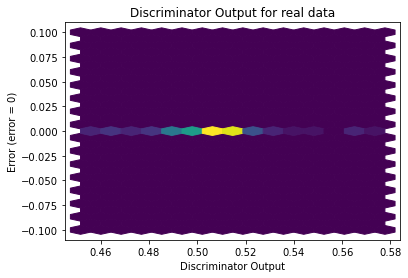

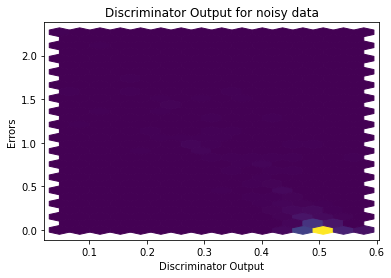

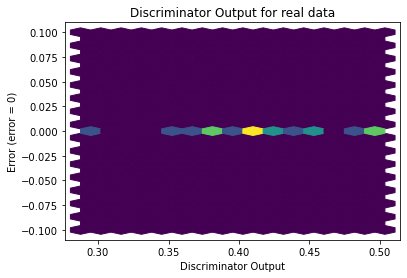

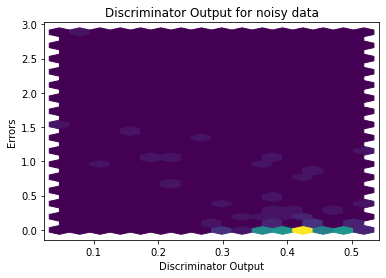

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


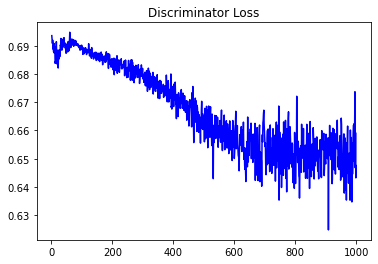

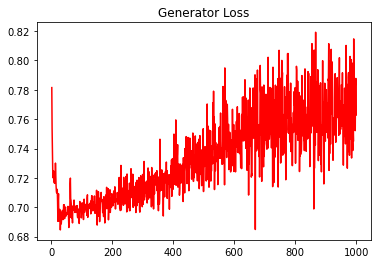

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.34715174193728904


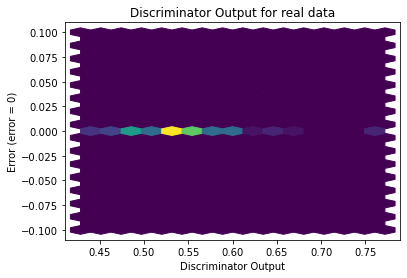

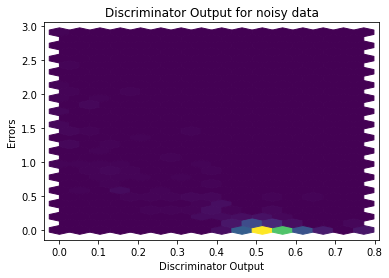

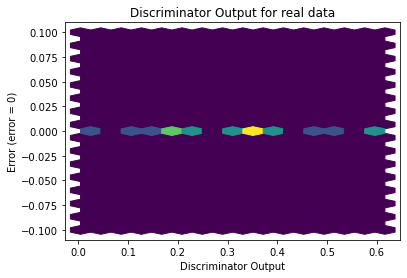

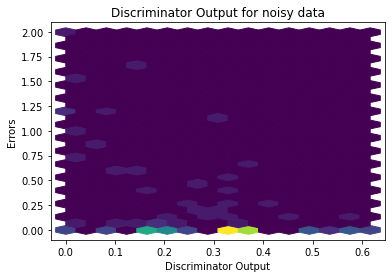

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2061]], requires_grad=True)
